# Anime Recommender System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Anime.csv')

In [4]:
df.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             18495 non-null  int64  
 1   Name             18495 non-null  object 
 2   Japanese_name    7938 non-null   object 
 3   Type             18495 non-null  object 
 4   Episodes         9501 non-null   float64
 5   Studio           12018 non-null  object 
 6   Release_season   4116 non-null   object 
 7   Tags             18095 non-null  object 
 8   Rating           15364 non-null  float64
 9   Release_year     18112 non-null  float64
 10  End_year         2854 non-null   float64
 11  Description      18491 non-null  object 
 12  Content_Warning  1840 non-null   object 
 13  Related_Mange    7627 non-null   object 
 14  Related_anime    10063 non-null  object 
 15  Voice_actors     15309 non-null  object 
 16  staff            13005 non-null  object 
dtypes: float64(4

In [6]:
df.describe()

,Rank,Episodes,Rating,Release_year,End_year
count,18495.00000,9501.000000,15364.000000,18112.000000,2854.000000
mean,9248.00000,20.920850,3.355133,2006.520318,2004.256132
std,5339.19095,37.990858,0.400624,15.189537,13.257484
min,1.00000,1.000000,0.960000,1907.000000,1962.000000
25%,4624.50000,2.000000,3.130000,2001.000000,1996.000000
50%,9248.00000,12.000000,3.360000,2012.000000,2007.000000
75%,13871.50000,26.000000,3.590000,2017.000000,2015.000000
max,18495.00000,800.000000,4.600000,2023.000000,2022.000000


In [7]:
df['Tags'][1]

'Drama, Fantasy, Romance, Shoujo, Animal Transformation, Contemporary Fantasy, Curse, Dysfunctional Families, Mental Illness, Orphans, Based on a Manga, Emotional Abuse,, Mature Themes,, Physical Abuse,, Suicide,, Violence,, Domestic Abuse'

In [8]:
df['Description'][1]

"'The final arc of Fruits Basket.'"

In [9]:
df['Studio'][1]

'TMS Entertainment'

A look at the average rating of each title name.

In [10]:
df.groupby('Name')['Rating'].mean().sort_values(ascending= False).head(10)

Name
Fruits Basket the Final Season                                 4.60
Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc    4.60
Mo Dao Zu Shi 3                                                4.58
Fullmetal Alchemist: Brotherhood                               4.58
Attack on Titan 3rd Season: Part II                            4.57
Attack on Titan The Final Season: Part II                      4.56
Jujutsu Kaisen                                                 4.56
Attack on Titan The Final Season                               4.55
Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train             4.54
Haikyuu!! Karasuno High School vs Shiratorizawa Academy        4.53
Name: Rating, dtype: float64

## Preparing Data

To prepare the data, only certain columns will be used for building the recommendation system. Furthermore, the variables will be looked into to determine what is and is not in the variables.

In [11]:
anime_df = df[['Rank', 'Name', 'Type', 'Studio', 'Tags', 'Rating', 'Description']]

In [12]:
anime_df.head()

,Rank,Name,Type,Studio,Tags,Rating,Description
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,TV,ufotable,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,'Tanjiro and his friends accompany the Hashira...
1,2,Fruits Basket the Final Season,TV,TMS Entertainment,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,'The final arc of Fruits Basket.'
2,3,Mo Dao Zu Shi 3,Web,B.C MAY PICTURES,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,'The third season of Mo Dao Zu Shi.'
3,4,Fullmetal Alchemist: Brotherhood,TV,Bones,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,"""The foundation of alchemy is based on the law..."
4,5,Attack on Titan 3rd Season: Part II,TV,WIT Studio,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,'The battle to retake Wall Maria begins now! W...


In [13]:
anime_df.duplicated().sum()

0

In [14]:
anime_df['Studio'].value_counts()

Toei Animation       737
Sunrise              476
J.C.Staff            382
TMS Entertainment    364
MADHOUSE             357
                    ... 
Studio Shelter         1
Fall 2005              1
Studio Bogey           1
Studio Yamato          1
Spring 1997            1
Name: Studio, Length: 745, dtype: int64

In [15]:
anime_df['Type'].unique()

array(['TV   ', 'Web  ', 'Movie', 'OVA  ', 'Music', 'TV Sp', 'DVD S',
       'Other'], dtype=object)

In [16]:
anime_df['Type'].value_counts()

TV       5446
Movie    3577
Web      2488
OVA      2235
Music    2165
Other     990
DVD S     911
TV Sp     683
Name: Type, dtype: int64

In [17]:
anime_df.isnull().sum()

Rank              0
Name              0
Type              0
Studio         6477
Tags            400
Rating         3131
Description       4
dtype: int64

<AxesSubplot:>

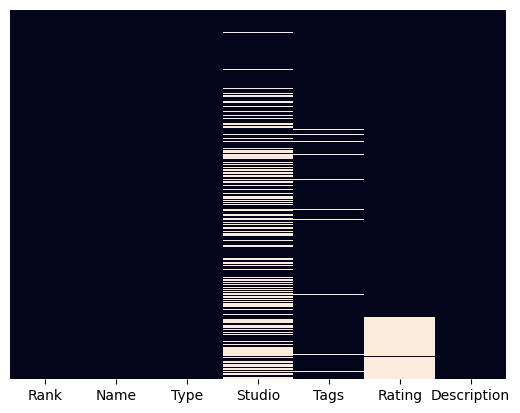

In [18]:
sns.heatmap(anime_df.isnull(), cbar= False, yticklabels= False)

## Cleaning Data

To make the recommendations more relevant to the anime plotlines, filler content will be removed. Through some research, two categories will be dropped from Type feature. OVA content was kept because, although most are filler, some are plot related. It was felt safer to keep that data for now.

In [19]:
filler_content = anime_df[(anime_df['Type'] == 'Music') | (anime_df['Type'] == 'TV Sp')].index

In [20]:
anime_df.drop(filler_content, inplace = True)

The Studio column has too many missing values and would be difficult and time cinsuming to imputate, with accuracy, on which studio is associated with the anime. This column will be removed.

In [21]:
anime_df.drop('Studio', axis= 1, inplace= True)

<AxesSubplot:>

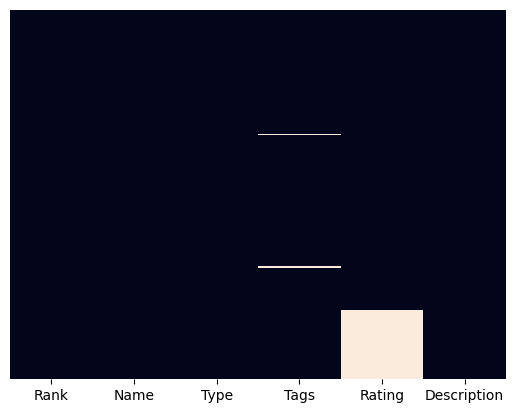

In [22]:
sns.heatmap(anime_df.isnull(), cbar= False, yticklabels= False)

In [23]:
anime_df.isnull().sum()

Rank              0
Name              0
Type              0
Tags             75
Rating         2927
Description       4
dtype: int64

Now to address the description column.

In [24]:
anime_df['Description'].tail()

18490    Special episodes of Qin Shi Mingyue: Canghai H...
18491                   No synopsis yet - check back soon!
18492                   No synopsis yet - check back soon!
18493                   No synopsis yet - check back soon!
18494                   No synopsis yet - check back soon!
Name: Description, dtype: object

### Cleaning Tags Data

To clean the Tags varaible, a look into its correlations will show if this is an important feature for the recommendation system.

In [25]:
# need to remove NaN values to use later function
filter_nulls = anime_df[(anime_df['Description'].isnull()) | (anime_df['Tags'].isnull())].index

In [26]:
anime_df.drop(filter_nulls, inplace= True)

In [27]:
anime_df.isnull().sum()

Rank              0
Name              0
Type              0
Tags              0
Rating         2915
Description       0
dtype: int64

In [28]:
anime_df['Tags Length'] = anime_df['Tags'].apply(len)

In [29]:
anime_data = anime_df.copy()

In [30]:
anime_rating = anime_data.groupby('Rating').mean()

In [31]:
anime_rating.reset_index().corr()

,Rating,Rank,Tags Length
Rating,1.000000,-0.932849,0.701483
Rank,-0.932849,1.000000,-0.709693
Tags Length,0.701483,-0.709693,1.000000


<AxesSubplot:>

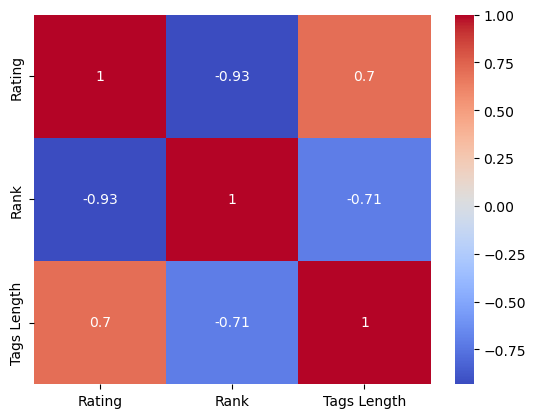

In [32]:
sns.heatmap(anime_rating.reset_index().corr(), cmap= 'coolwarm', annot= True)

Lets see the correlation when Rating is ungrouped.

In [33]:
corr_anime_data = anime_data.corr()

<AxesSubplot:>

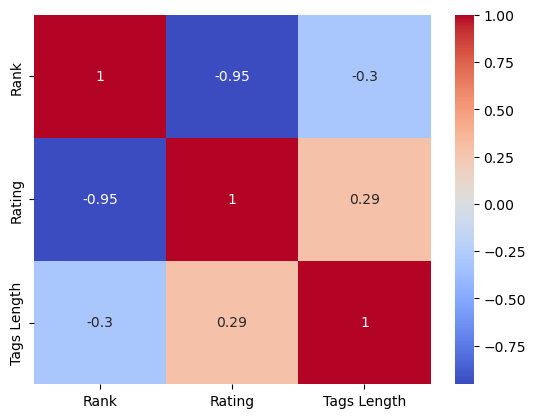

In [34]:
sns.heatmap(corr_anime_data, cmap= 'coolwarm', annot= True)

<Figure size 1200x600 with 0 Axes>

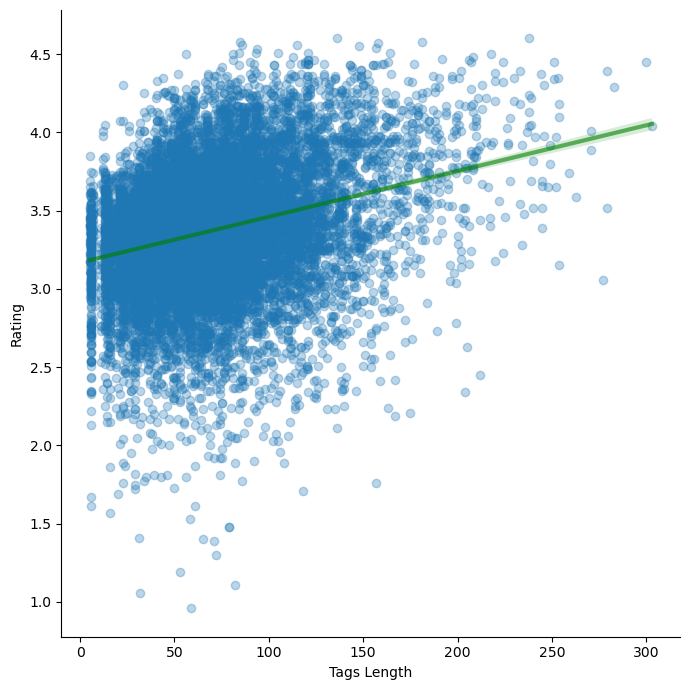

In [35]:

plt.figure(figsize= (12, 6))

#sns.jointplot(data= anime_data, x= 'Tags Length', y= 'Rating')
anime_plot = sns.lmplot(data= anime_data, x= 'Tags Length', y= 'Rating', size= 7,
                       line_kws= {'lw': 3, 'color': 'green', 'alpha': 0.6},
                       scatter_kws= {'alpha': 0.3})
anime_plot.set_xlabels('Tags Length')
anime_plot.set_ylabels('Rating')

Since the correlations show an obvious relationship with Rank and Ratings and a weak relationship with Tags Length and Rating, let's finish cleaning the rest of our data for our recommender system.

### Cleaning up Remaining Data

Since Rating has a connection to Tags, imputatation on the nulls will be filled with the average rating.

In [36]:
col_mean = anime_df['Rating'].mean()

anime_df['Rating'].fillna(value= col_mean, inplace= True)

<AxesSubplot:>

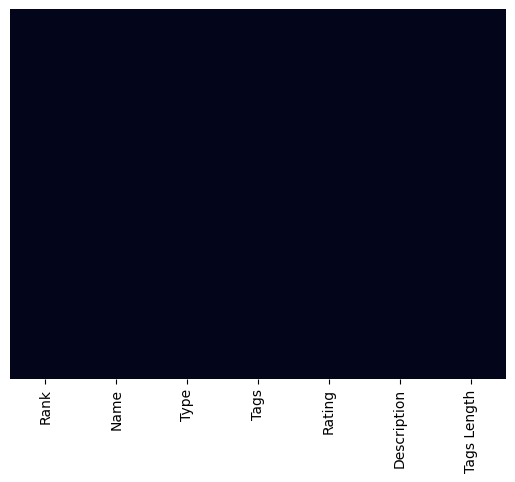

In [37]:
sns.heatmap(anime_df.isnull(), cbar= False, yticklabels= False)

In [38]:
anime_df.isnull().sum()

Rank           0
Name           0
Type           0
Tags           0
Rating         0
Description    0
Tags Length    0
dtype: int64

One last part needs cleaning. When the unique values were shown for the Type variable, trailing whitespaces were seen. These need to be handled to get a consistency and accuracy.

In [39]:
anime_df['Type'].unique()

array(['TV   ', 'Web  ', 'Movie', 'OVA  ', 'DVD S', 'Other'], dtype=object)

In [40]:
def space_remover(column):
    """
    1). Iterate through a column.
    2). For each value, split the string to then join them by the space and assign back to the column.
    3). return the column.
    """
    for text in column:
        column = ' '.join(column.split())
        # print(column)
    return column

In [41]:
anime_df['Type2'] = anime_df['Type'].apply(space_remover)

In [42]:
anime_df['Type2'].unique()

array(['TV', 'Web', 'Movie', 'OVA', 'DVD S', 'Other'], dtype=object)

In [43]:
anime_df = anime_df.drop('Type', axis= 1)

With our data clean, the last step is to clean up the Tags column to tokenize them for our recommender system.

In [44]:
import string
from nltk.corpus import stopwords

In [45]:
def text_cleanup(words):
    """
    1). Remove punctuation
    2). Remove stopwords
    3). Return list of clean text
    """
    
    nopunc = [char for char in words if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [46]:
# change Tags' strings to tokens
anime_df['Tags'].head().apply(text_cleanup)

0    [action, adventure, fantasy, shounen, demons, ...
1    [drama, fantasy, romance, shoujo, animal, tran...
2    [fantasy, ancient, china, chinese, animation, ...
3    [action, adventure, drama, fantasy, mystery, s...
4    [action, fantasy, horror, shounen, dark, fanta...
Name: Tags, dtype: object

In [47]:
anime_df.shape

(15568, 7)

Now that we have our function to create tokens, we can make our recommendation system

## Create the Text Vectors

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
covec = CountVectorizer(max_features= 15500, analyzer= text_cleanup)

In [50]:
covec.fit_transform(anime_df['Tags']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
covec.fit_transform(anime_df['Tags']).toarray().shape

(15568, 617)

In [52]:
print(covec.get_feature_names()[:15])

['15th', '16th', '17th', '18th', '19th', '2', '4koma', 'abstract', 'abuse', 'acting', 'action', 'adult', 'adventure', 'africa', 'afterlife']


In [53]:
token_vectors = covec.fit_transform(anime_df['Tags']).toarray()

## Make the Recommendation System

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
text_similarity = cosine_similarity(token_vectors)

In [56]:
text_similarity

array([[1.        , 0.26568447, 0.16329932, ..., 0.        , 0.        ,
        0.        ],
       [0.26568447, 1.        , 0.16269784, ..., 0.        , 0.        ,
        0.        ],
       [0.16329932, 0.16269784, 1.        , ..., 0.25819889, 0.25819889,
        0.        ],
       ...,
       [0.        , 0.        , 0.25819889, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.25819889, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [57]:
text_similarity.shape

(15568, 15568)

In [58]:
df = pd.DataFrame(text_similarity, columns=anime_df['Name'], index=anime_df['Name']).reset_index()

df.head()

Name,Name,Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc,Fruits Basket the Final Season,Mo Dao Zu Shi 3,Fullmetal Alchemist: Brotherhood,Attack on Titan 3rd Season: Part II,Jujutsu Kaisen,Attack on Titan The Final Season: Part II,Attack on Titan The Final Season,Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train,...,Zhandou Ba Geji! Shanyao de Richang,Better back then,Make My Day,Shachiku-san wa Youjo Yuurei ni Iyasaretai.,Nostalgia,Qin Shi Mingyue: Canghai Hengliu Xiaomeng Specials,Yi Tang Juchang: Sanguo Yanyi,Fenghuang Ji Xiang Yu Qingming Shanghe Tu,Chengshi Jiyi Wo Men de Jieri,Heisei Inu Monogatari Bow: Genshi Inu Monogatari Bow
0,Demon Slayer: Kimetsu no Yaiba - Entertainment...,1.000000,0.265684,0.163299,0.430706,0.473879,0.429669,0.429669,0.461880,0.791155,...,0.0,0.000000,0.000000,0.163299,0.000000,0.286446,0.000000,0.000000,0.000000,0.0
1,Fruits Basket the Final Season,0.265684,1.000000,0.162698,0.572159,0.275411,0.190261,0.332956,0.575224,0.404226,...,0.0,0.000000,0.000000,0.108465,0.070014,0.000000,0.000000,0.000000,0.000000,0.0
2,Mo Dao Zu Shi 3,0.163299,0.162698,1.000000,0.131876,0.217643,0.087706,0.263117,0.212132,0.149071,...,0.3,0.129099,0.000000,0.100000,0.129099,0.438529,0.447214,0.258199,0.258199,0.0
3,Fullmetal Alchemist: Brotherhood,0.430706,0.572159,0.131876,1.000000,0.382692,0.289157,0.462652,0.606128,0.491473,...,0.0,0.000000,0.000000,0.131876,0.085126,0.057831,0.000000,0.000000,0.000000,0.0
4,Attack on Titan 3rd Season: Part II,0.473879,0.275411,0.217643,0.382692,1.000000,0.445399,0.699913,0.666886,0.378517,...,0.0,0.000000,0.114708,0.145095,0.000000,0.063628,0.000000,0.000000,0.000000,0.0


In [59]:
input_anime = 'Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc'

recommendation = pd.DataFrame(df.nlargest(6, input_anime)['Name'])

recommender = recommendation[recommendation['Name']!=input_anime]

print(recommender)

                                                   Name
12                       Demon Slayer: Kimetsu no Yaiba
8     Demon Slayer: Kimetsu no Yaiba Movie - Mugen T...
268                                     Hunter x Hunter
2076                    JoJo's Bizarre Adventure (2000)
47         Demon Slayer: Kimetsu no Yaiba - Mugen Train


In [60]:
def recommender():
    
    input_anime = input('Please enter Anime name here: ')

    recommendation = pd.DataFrame(df.nlargest(21, input_anime)['Name'])

    recommender = recommendation[recommendation['Name']!=input_anime]

    return(recommender)

In [61]:
recommender()

Please enter Anime name here: Tokyo Ghoul


,Name
3192,Tokyo Ghoul:re
2051,Tokyo Ghoul: Pinto
1173,Tokyo Ghoul √A
1742,Ajin: Demi-Human
10826,Shadow Star Narutaru
935,Ajin: Demi-Human 2nd Season
11967,Violence Jack 2: Evil Town
5957,Devilman: The Birth
12009,Violence Jack 3: Hell's Wind
6939,Tokko


# End